[Read More about Shapley Values](#shapley-values-guide)

In [1]:
import numpy as np
from transformers import AutoTokenizer, AutoModelForCausalLM
import shap
import torch

In [2]:
tokenizer = AutoTokenizer.from_pretrained("gpt2", use_fast=True)
model = AutoModelForCausalLM.from_pretrained("gpt2")

In [3]:
# set model decoder to true
model.config.is_decoder=True
# set text-generation params under task_specific_params
model.config.task_specific_params["text-generation"] = {
    "do_sample": True,
    "max_length": 50,
    "temperature": 0.7,
    "top_k": 50,
    "no_repeat_ngram_size": 2
}

In [7]:
s = ['I enjoy walking with my cute girl']

In [8]:
explainer = shap.Explainer(model, tokenizer)
shap_values = explainer(s)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [10]:
shap.plots.text(shap_values)

In [14]:
def plot_xai(s):
    shap_values = explainer(s)
    return shap.plots.text(shap_values)

In [13]:
plot_xai(['I am starting my own business'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [15]:
plot_xai(['the show must go on'])

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


**You can also play around by hovering on different inputs and outputs tokens**

# shapley-values-guide

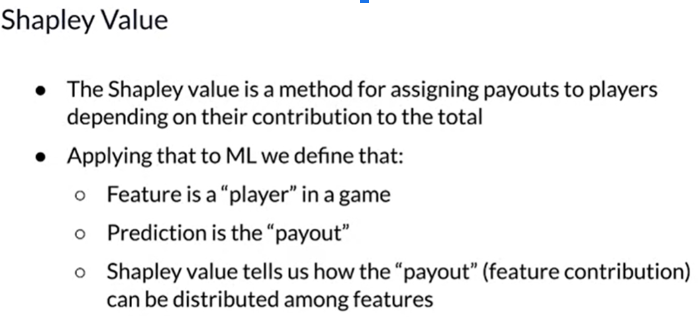
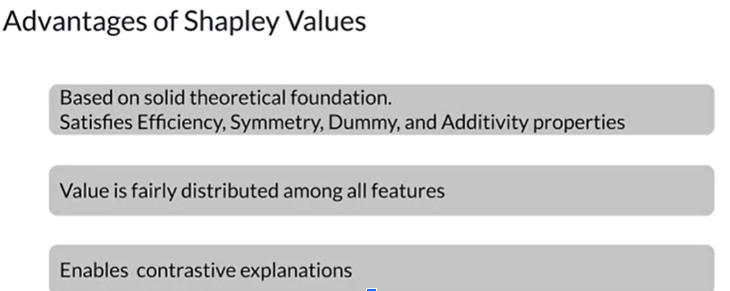
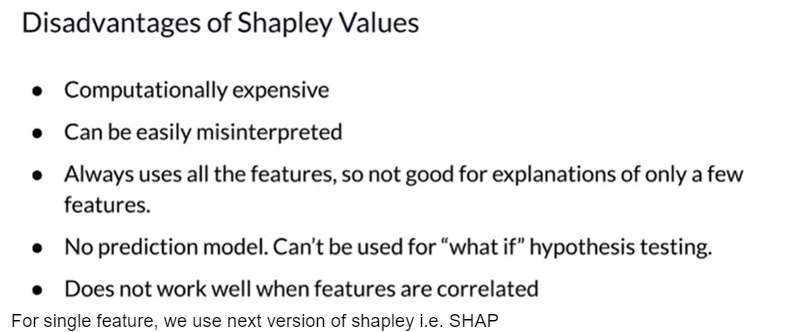
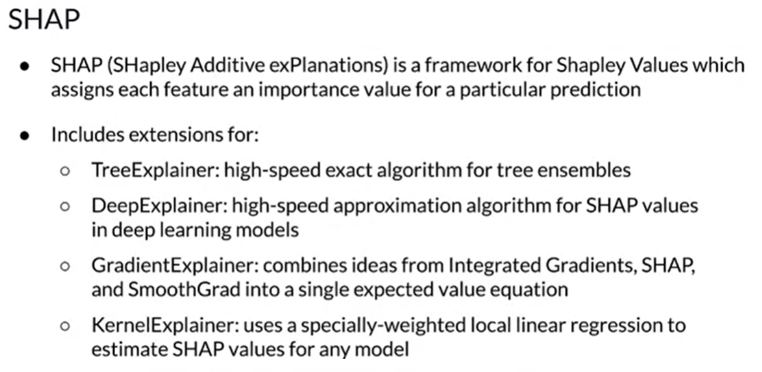